<a href="https://colab.research.google.com/github/sprashant19/Task/blob/main/Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [ ]:
dataset=pd.read_csv("/content/car_data.csv")
dataset

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [ ]:
dataset.head()
dataset.shape

(804, 12)

In [ ]:
dataset.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


Task Part 1

Visualization

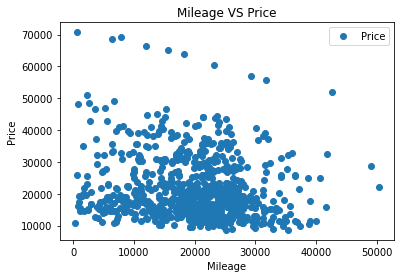

,Mileage,Price
Mileage,1.000000,-0.143051
Price,-0.143051,1.000000


In [ ]:
dataset.plot(x="Mileage",y="Price",style="o")
plt.title("Mileage VS Price")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()
dataset[["Mileage","Price"]].corr()

The correlation between Mileage and Price is -0.143 which is in between -0.2 and 0.2. So it shows there is some Linear Relationship between Mileage and Price.

Preparing the Data

In [ ]:
x=dataset.iloc[:,[1]].values 
y=dataset.Price.values


In [ ]:
print(x.shape)
print(y.shape)

(804, 1)
(804,)


Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

Scaling or Normalizing the *data*

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()           #Initializing Scaling
scaler.fit(x_train,y_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train_scaled,y_train) 

LinearRegression()

In [ ]:
coeff_df=pd.DataFrame(regressor.coef_,['Mileage'],columns=["Coefficient"])
y_pred=regressor.predict(x_test_scaled)
coeff_df

,Coefficient
Mileage,-1450.118086


In [ ]:
regressor.intercept_

21286.771470559215

In [ ]:
from sklearn import metrics
print("R2 Score:",metrics.r2_score(y_test,y_pred)) 

R2 Score: 0.01651822401249481


R2 score of value 0.0165 is not a good fit, so we need to look for other options

Chart the original data and Linear Regression equation

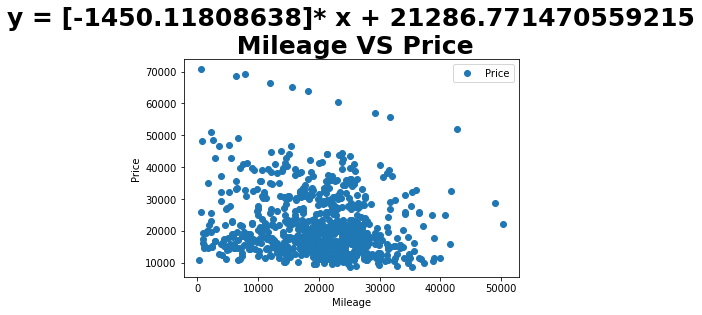

In [ ]:
dataset.plot(x="Mileage",y="Price",style="o")
plt.title("y = {0}* x + {1}\n Mileage VS Price".format(regressor.coef_,regressor.intercept_),fontweight='bold',size=25)
#plt.title("Mileage VS Price")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

Task Part 2

Visualization

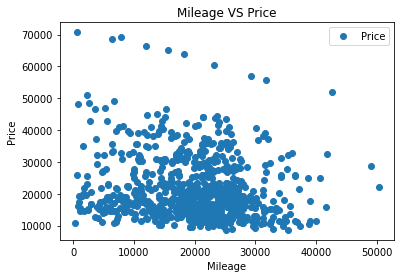

,Mileage,Price
Mileage,1.000000,-0.143051
Price,-0.143051,1.000000


In [ ]:
dataset.plot(x="Mileage",y="Price",style="o")
plt.title("Mileage VS Price")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()
dataset[["Mileage","Price"]].corr()

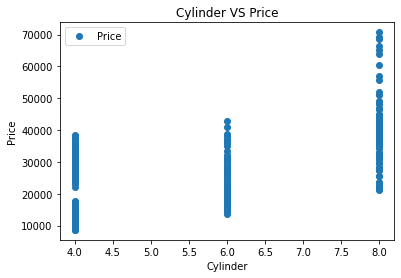

,Cylinder,Price
Cylinder,1.000000,0.569086
Price,0.569086,1.000000


In [ ]:
dataset.plot(x="Cylinder",y="Price",style="o")
plt.title("Cylinder VS Price")
plt.xlabel("Cylinder")
plt.ylabel("Price")
plt.show()
dataset[["Cylinder","Price"]].corr()

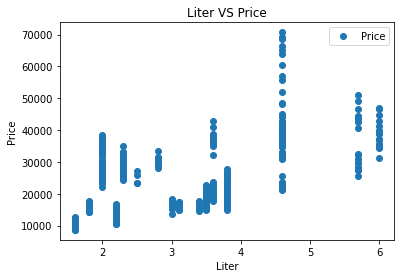

,Liter,Price
Liter,1.000000,0.558146
Price,0.558146,1.000000


In [ ]:
dataset.plot(x="Liter",y="Price",style="o")
plt.title("Liter VS Price")
plt.xlabel("Liter")
plt.ylabel("Price")
plt.show()
dataset[["Liter","Price"]].corr()

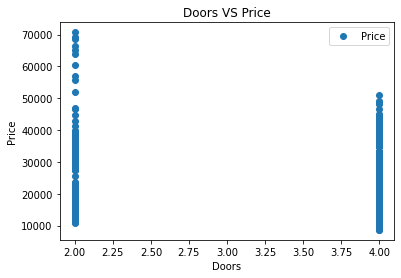

,Doors,Price
Doors,1.00000,-0.13875
Price,-0.13875,1.00000


In [ ]:
dataset.plot(x="Doors",y="Price",style="o")
plt.title("Doors VS Price")
plt.xlabel("Doors")
plt.ylabel("Price")
plt.show()
dataset[["Doors","Price"]].corr()

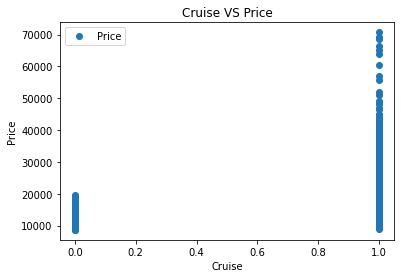

,Cruise,Price
Cruise,1.000000,0.430851
Price,0.430851,1.000000


In [ ]:
dataset.plot(x="Cruise",y="Price",style="o")
plt.title("Cruise VS Price")
plt.xlabel("Cruise")
plt.ylabel("Price")
plt.show()
dataset[["Cruise","Price"]].corr()

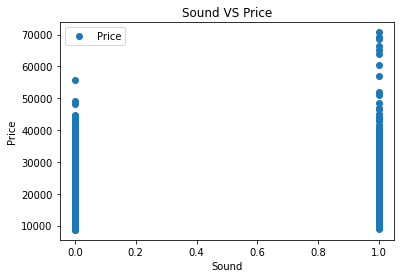

,Sound,Price
Sound,1.000000,-0.124348
Price,-0.124348,1.000000


In [ ]:
dataset.plot(x="Sound",y="Price",style="o")
plt.title("Sound VS Price")
plt.xlabel("Sound")
plt.ylabel("Price")
plt.show()
dataset[["Sound","Price"]].corr()

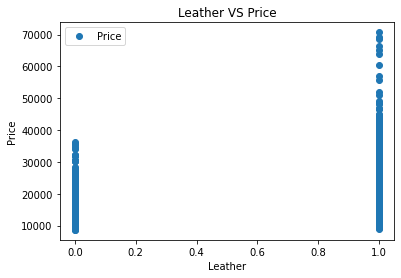

,Leather,Price
Leather,1.000000,0.157197
Price,0.157197,1.000000


In [ ]:
dataset.plot(x="Leather",y="Price",style="o")
plt.title("Leather VS Price")
plt.xlabel("Leather")
plt.ylabel("Price")
plt.show()
dataset[["Leather","Price"]].corr()

In [ ]:
dataset.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


Among the above correlation between Price as Target and others as feature, Cylinder VS Price has the best correlation as 0.569086

Preparing the Data

In [ ]:
x=dataset[["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather"]].values
y=dataset["Price"].values

Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

Scaling or Normalizing the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train,y_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train_scaled,y_train)

LinearRegression()

In [ ]:
coeff_df=pd.DataFrame(regressor.coef_,["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather"],columns=["Coefficient"])
y_pred=regressor.predict(x_test_scaled)
coeff_df

,Coefficient
Mileage,-1334.430469
Cylinder,5824.696593
Liter,-1169.693492
Doors,-1242.270297
Cruise,2694.448242
Sound,-793.379267
Leather,1494.867212


In [ ]:
print("c = ",regressor.intercept_)

c =  21343.084104012396


In [ ]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,14862.093870,26723.866269
1,11413.530403,17946.307157
2,19567.259291,27803.697910
3,11539.845650,14606.371698
4,18063.004911,22064.894662
...,...,...
156,19751.041431,26551.722764
157,18527.208971,21602.842111
158,34392.995272,22416.702326
159,20099.256845,26537.341132


Evaluation Metrics

In [ ]:
from sklearn import metrics
print("R2 Score :",metrics.r2_score(y_test,y_pred))

R2 Score : 0.37900794053708475


R2 Score Mileage,Cylinder,Liter,Doors,etc VS Price is 0.37, which is not a good fit for the model

Feature Selection using Sequential Feature Selector

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator=LinearRegression()
sfs=SequentialFeatureSelector(estimator,n_features_to_select=2)
sfs.fit(x_train_scaled,y_train)
print(list(zip(["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather"],sfs.get_support())))

[('Mileage', False), ('Cylinder', True), ('Liter', False), ('Doors', False), ('Cruise', True), ('Sound', False), ('Leather', False)]


By doing the Sequential Feature Selector, we can conclude that Cylinder or Cruise can be the best feature combination to determine the Price for the dataset.

Task Part 3

In [ ]:
dataset

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [ ]:
dataset.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
dataset["Make_"]=labelencoder.fit_transform(dataset["Make"])
dataset["Model_"]=labelencoder.fit_transform(dataset["Model"])
dataset["Body_type"]=labelencoder.fit_transform(dataset["Type"])
dataset

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_,Model_,Body_type
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,0,10,3
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,0,10,3
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,0,10,3
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,0,10,3
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0,5,21,3
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,5,21,3
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,5,21,3
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,5,21,3


In [ ]:
dataset.drop(['Make','Model','Type','Trim'],axis=1)

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_,Model_,Body_type
0,17314.103129,8221,6,3.1,4,1,1,1,0,10,3
1,17542.036083,9135,6,3.1,4,1,1,0,0,10,3
2,16218.847862,13196,6,3.1,4,1,1,0,0,10,3
3,16336.913140,16342,6,3.1,4,1,0,0,0,10,3
4,16339.170324,19832,6,3.1,4,1,0,1,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,6,3.0,4,1,0,0,5,21,3
800,16175.957604,19095,6,3.0,4,1,1,0,5,21,3
801,15731.132897,20484,6,3.0,4,1,1,0,5,21,3
802,15118.893228,25979,6,3.0,4,1,1,0,5,21,3


Visualization

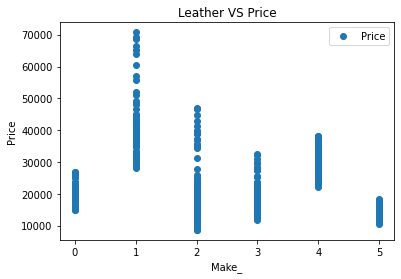

,Make_,Price
Make_,1.000000,-0.131644
Price,-0.131644,1.000000


In [ ]:
dataset.plot(x="Make_",y="Price",style="o")
plt.title("Leather VS Price")
plt.xlabel("Make_")
plt.ylabel("Price")
plt.show()
dataset[["Make_","Price"]].corr()

The correlation between Make_ and Price is not  good fit, there is no Linear Relation between them.

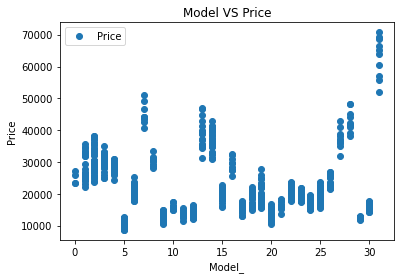

,Model_,Price
Model_,1.000000,-0.026599
Price,-0.026599,1.000000


In [ ]:
dataset.plot(x="Model_",y="Price",style="o")
plt.title("Model VS Price")
plt.xlabel("Model_")
plt.ylabel("Price")
plt.show()
dataset[["Model_","Price"]].corr()

The correlation between Model_ and Price is not  good fit, there is no Linear Relation between them.

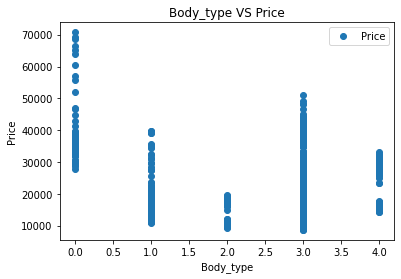

,Body_type,Price
Body_type,1.000000,-0.163871
Price,-0.163871,1.000000


In [ ]:
dataset.plot(x="Body_type",y="Price",style="o")
plt.title("Body_type VS Price")
plt.xlabel("Body_type")
plt.ylabel("Price")
plt.show()
dataset[["Body_type","Price"]].corr()

The correlation between Body_type and Price is not  good fit, there is no Linear Relation between them.

Preparing the Data

In [ ]:
x=dataset[['Make_','Model_','Body_type']].values
y=dataset['Price'].values

Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

Scaling or Normalizing the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train,y_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train_scaled,y_train)

LinearRegression()

In [ ]:
coeff_df=pd.DataFrame(regressor.coef_,['Make_','Model_','Body_type'],columns=["Coefficient"])
y_pred=regressor.predict(x_test_scaled)
coeff_df

,Coefficient
Make_,-1548.435357
Model_,-627.555051
Body_type,-1824.240284


In [ ]:
print(regressor.intercept_)

21362.904803929105


Evaluation Metrics


In [ ]:
from sklearn import metrics
print("R2 Score :",metrics.r2_score(y_test,y_pred))

R2 Score : 0.04559008620726657


R2 score of 0.04 is not a good fit for the model, so we should go for other options

Feature Selection----> Repeated Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE
estimator=LinearRegression()
selector = RFE(estimator,n_features_to_select=2,step=1)        
selector=selector.fit(x_train,y_train)
list(zip(['Make_','Model_','Body_type'],selector.support_))

[('Make_', True), ('Model_', False), ('Body_type', True)]

As the Feature Selection predicts that only Make_ and Body_type can be used as the Best feature combination to predict the Price well.